# Twitter Sentiment Analysis 

### Analyze how travelers in February 2015 expressed their feelings on Twitter

### A sentiment analysis job about the problems of each major U.S. airline.
### Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [513]:
# Importing the basic libraries  which is needed in the RNN Model


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM,Embedding,Dropout,BatchNormalization,GRU
from keras.optimizers import Adam
from keras import losses

In [514]:
data = pd.read_csv(r"C:\Users\dtdee\OneDrive\Desktop\Letsupgrade_Python\Machine_Learning\Deep_Learning\RNN Model\Tweets.csv")

In [515]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [516]:
data=data[['text','airline_sentiment']]
data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [517]:
data.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [518]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [519]:
X =data['text']
Y =data['airline_sentiment']

In [520]:
X 

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [521]:
Y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [522]:
# We will try to split the data into test and train data.

X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size= 0.2)

In [523]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11712,), (2928,), (11712,), (2928,))

In [524]:
# We will use Tokenzier to create the matrix of each rows.

token =Tokenizer(num_words=100,lower=True)

token.fit_on_texts(X_train)
token.fit_on_texts(X_test)

X_train= token.texts_to_sequences(X_train)
X_test= token.texts_to_sequences(X_test)


In [525]:
X_train[0]

[16, 57, 21, 59, 6, 98, 3, 1]

In [526]:
# Checking all the words in the vocab with thier index values

print(token.word_index)

print()
print()

print(token.index_word)

{'to': 1, 'the': 2, 'i': 3, 'a': 4, 'united': 5, 'you': 6, 'for': 7, 'flight': 8, 'on': 9, 'and': 10, 'my': 11, 'usairways': 12, 'americanair': 13, 'is': 14, 'in': 15, 'southwestair': 16, 'jetblue': 17, 'of': 18, 'me': 19, 'it': 20, 'your': 21, 'have': 22, 'was': 23, 'not': 24, 'with': 25, 'no': 26, 'that': 27, 'at': 28, 'this': 29, 'get': 30, 'but': 31, 't': 32, 'co': 33, 'be': 34, 'from': 35, 'http': 36, 'can': 37, 'are': 38, 'thanks': 39, 'cancelled': 40, 'we': 41, 'now': 42, 'an': 43, 'just': 44, 'service': 45, 'do': 46, 'so': 47, '2': 48, 'help': 49, 'been': 50, 'time': 51, 'will': 52, 'customer': 53, 'up': 54, 'out': 55, 'our': 56, 'they': 57, "i'm": 58, 'amp': 59, 'hours': 60, 'us': 61, 'what': 62, 'when': 63, 'flights': 64, 'hold': 65, 'how': 66, 'plane': 67, 'if': 68, 'all': 69, 'why': 70, 'thank': 71, 'still': 72, 'there': 73, 'one': 74, 'please': 75, 'need': 76, 'would': 77, 'delayed': 78, "can't": 79, 'back': 80, 'virginamerica': 81, 'gate': 82, 'call': 83, 'about': 84, 'ha

In [527]:
# Checking which word is repeated how many times.

token.word_counts

OrderedDict([('southwestair', 2458),
             ('everyone', 82),
             ('deserves', 14),
             ('red', 16),
             ('carpet', 3),
             ('tx', 10),
             ('until', 115),
             ('they', 693),
             ('destroy', 1),
             ('your', 1743),
             ('luggage', 263),
             ('amp', 683),
             ('only', 337),
             ('give', 170),
             ('you', 4132),
             ('75', 27),
             ('voucher', 108),
             ('like', 430),
             ('i', 5415),
             ('want', 269),
             ('to', 8652),
             ('fly', 385),
             ('w', 264),
             ('them', 255),
             ('again', 392),
             ('usairways', 3053),
             ('dude', 3),
             ('named', 7),
             ('shaquille', 1),
             ('at', 1489),
             ('the', 6059),
             ('desk', 70),
             ('in', 2583),
             ('charlotte', 65),
             ('was', 1607),
    

In [528]:
# Now we will see how many rows are there in our document
print(token.document_count)

print()

# We want see how many unique word present in our document
print(len(token.word_index))

14640

15768


In [529]:
token.document_count

14640

In [530]:
X_train[2:6]

[[5, 52, 46, 44, 76, 1, 30, 10, 11, 88, 39],
 [17, 20, 90],
 [13, 63, 6, 79, 9, 65, 1, 30, 49, 93, 4, 8, 40],
 [5, 76, 4]]

In [531]:
# Since we know that the length of the each sentences is not uniform so we need to pad these lines

from keras.utils import pad_sequences

X_train = pad_sequences(X_train,maxlen=20,padding='post')
X_test = pad_sequences(X_test,maxlen=20,padding='post')

In [532]:
X_train[2:6]

array([[ 5, 52, 46, 44, 76,  1, 30, 10, 11, 88, 39,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [17, 20, 90,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [13, 63,  6, 79,  9, 65,  1, 30, 49, 93,  4,  8, 40,  0,  0,  0,
         0,  0,  0,  0],
       [ 5, 76,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])

In [533]:
# Changing the shape of the input array is needed because RNN algorithm accepts array of a specific shape

X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [534]:
print(X_train.shape)
print(X_test.shape)

(11712, 20, 1)
(2928, 20, 1)


In [535]:
encoder=LabelEncoder()

y_train= encoder.fit_transform(y_train)
y_test= encoder.fit_transform(y_test)

In [536]:
# This shows the encoding is done in 2--> 'positive' ,0-->'negative' , 1-->'neutral'

print(y_train[0:5])
print(encoder.inverse_transform(y_train[0:5]))
print()

print(y_test)

[0 2 2 2 0]
['negative' 'positive' 'positive' 'positive' 'negative']

[1 0 2 ... 0 0 0]


In [537]:
y_train= np.expand_dims(y_train,-1)

In [538]:
y_train= np.expand_dims(y_train,-1)

In [539]:
y_train.shape

(11712, 1, 1)

# Building our RNN architecture

In [543]:
model= Sequential()

model.add(Embedding(15768,input_length=20, output_dim=3))

model.add(SimpleRNN(units=128,return_sequences=False))

model.add(Dense(units=256,activation='relu'))
keras.layers.BatchNormalization()

model.add(Dense(units=512,activation='relu'))
keras.layers.Dropout(rate=0.1)

model.add(Dense(units=3,activation='softmax'))


model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 20, 3)             47304     
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 128)               16896     
                                                                 
 dense_59 (Dense)            (None, 256)               33024     
                                                                 
 dense_60 (Dense)            (None, 512)               131584    
                                                                 
 dense_61 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 230347 (899.79 KB)
Trainable params: 230347 (899.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [544]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [545]:
model.fit(X_train,y_train,epochs=50,batch_size=500)

Epoch 1/50
24/24 [==============================] - 5s 52ms/step - loss: 0.9107 - accuracy: 0.6107
Epoch 2/50
24/24 [==============================] - 1s 55ms/step - loss: 0.7982 - accuracy: 0.6551
Epoch 3/50
24/24 [==============================] - 1s 50ms/step - loss: 0.7224 - accuracy: 0.7033
Epoch 4/50
24/24 [==============================] - 1s 53ms/step - loss: 0.6760 - accuracy: 0.7204
Epoch 5/50
24/24 [==============================] - 1s 45ms/step - loss: 0.6582 - accuracy: 0.7316
Epoch 6/50
24/24 [==============================] - 1s 50ms/step - loss: 0.6422 - accuracy: 0.7358
Epoch 7/50
24/24 [==============================] - 1s 50ms/step - loss: 0.6410 - accuracy: 0.7388
Epoch 8/50
24/24 [==============================] - 1s 55ms/step - loss: 0.6363 - accuracy: 0.7403
Epoch 9/50
24/24 [==============================] - 1s 50ms/step - loss: 0.6307 - accuracy: 0.7426
Epoch 10/50
24/24 [==============================] - 1s 52ms/step - loss: 0.6294 - accuracy: 0.7446
Epoch 11/

# Testing the model based on test dataset

In [546]:
# class_labels=[2--> 'positive' ,0-->'negative' , 1-->'neutral']

y_pred = model.predict(X_test).round(2)
y_pred

92/92 [==============================] - 1s 4ms/step


array([[0.92, 0.04, 0.03],
       [0.47, 0.28, 0.24],
       [0.14, 0.36, 0.49],
       ...,
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ]], dtype=float32)

In [547]:
# Checking Predictions vs ground Reality

print(np.argmax(y_pred[10]))

print()

print(y_test[10])

0

0


In [548]:
# Checking Predictions vs ground Reality

print(np.argmax(y_pred[251]))

print()

print(y_test[251])

2

0


In [549]:
# Checking Predictions vs ground Reality

print(np.argmax(y_pred[2255]))

print()

print(y_test[2255])

0

0


In [550]:
model.evaluate(X_test,y_test)

92/92 [==============================] - 1s 8ms/step - loss: 0.9762 - accuracy: 0.7015


[0.9762070178985596, 0.7015027403831482]

In [551]:
# y_test= np.expand_dims(y_test,-1)
y_test[0]



1

In [552]:
class_labels = ['positive','negative','neutral']

y_pred_labels =[np.argmax(x) for x in y_pred]
y_test_labels =[x for x in y_test]

In [553]:
print(y_pred_labels[0:20])

print()

print(y_test_labels[0:20])

[0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0]

[1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0]


In [554]:
# Checking and predicting the each classes on confusion_matrix scores

cm= confusion_matrix(y_pred_labels,y_test_labels)
cm

array([[1585,  294,  181],
       [ 176,  265,   75],
       [  82,   67,  203]], dtype=int64)

<Axes: >

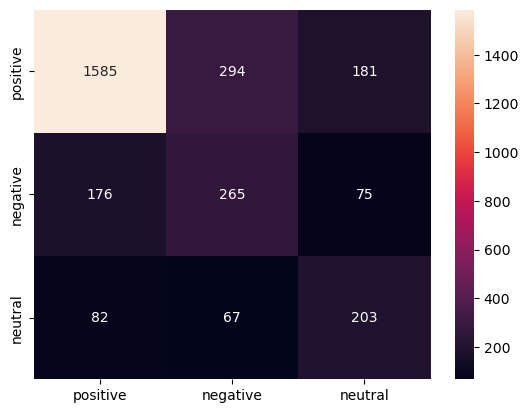

In [555]:
sns.heatmap(cm,annot=True,fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [556]:
# Checking all parameters of each lcass labels.

print(classification_report(y_pred_labels,y_test_labels,target_names=class_labels))

              precision    recall  f1-score   support

    positive       0.86      0.77      0.81      2060
    negative       0.42      0.51      0.46       516
     neutral       0.44      0.58      0.50       352

    accuracy                           0.70      2928
   macro avg       0.58      0.62      0.59      2928
weighted avg       0.73      0.70      0.71      2928

